In [1]:
# STEP 1: Smart Drive Mount & Path Handling
import os
import pandas as pd

def get_base_path():
    if os.path.exists('/content/drive'):
        from google.colab import drive
        drive.mount('/content/drive')
        return '/content/drive/MyDrive/hydraulic_project/data'
    return '../data'  # For local use or GitHub

base_path = get_base_path()

In [2]:
# === FUNCTION TO LOAD SENSOR FILE ===
def load_sensor(sensor_name):
    file_path = os.path.join(base_path, f"{sensor_name}.txt")
    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {sensor_name}.txt")
        return None
    df = pd.read_csv(file_path, sep='\t', header=None)
    df.columns = [f"{sensor_name}_t{i+1}" for i in range(df.shape[1])]
    print(f"✅ Loaded {sensor_name}.txt with shape {df.shape}")
    return df

In [3]:
# STEP 2: Define Sensor Groups (aligned with clear naming)
sensor_groups = {
    'pressure': ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6'],
    'motor_power': ['EPS1'],
    'volume_flow': ['FS1', 'FS2'],
    'temperature': ['TS1', 'TS2', 'TS3', 'TS4'],
    'vibration': ['VS1'],
    'cooling': ['CE', 'CP'],
    'efficiency': ['SE']
}

In [4]:
# STEP 3: Load Grouped Data
sensor_data = {}

for group, sensors in sensor_groups.items():
    dfs = []
    for sensor in sensors:
        df = load_sensor(sensor)
        if df is not None:
            dfs.append(df)
    if dfs:
        sensor_data[group] = pd.concat(dfs, axis=1)

✅ Loaded PS1.txt with shape (2205, 6000)
✅ Loaded PS2.txt with shape (2205, 6000)
✅ Loaded PS3.txt with shape (2205, 6000)
✅ Loaded PS4.txt with shape (2205, 6000)
✅ Loaded PS5.txt with shape (2205, 6000)
✅ Loaded PS6.txt with shape (2205, 6000)
✅ Loaded EPS1.txt with shape (2205, 6000)
✅ Loaded FS1.txt with shape (2205, 600)
✅ Loaded FS2.txt with shape (2205, 600)
✅ Loaded TS1.txt with shape (2205, 60)
✅ Loaded TS2.txt with shape (2205, 60)
✅ Loaded TS3.txt with shape (2205, 60)
✅ Loaded TS4.txt with shape (2205, 60)
✅ Loaded VS1.txt with shape (2205, 60)
✅ Loaded CE.txt with shape (2205, 60)
✅ Loaded CP.txt with shape (2205, 60)
✅ Loaded SE.txt with shape (2205, 60)


In [5]:
# STEP 4: Load Labels (profile.txt)
label_path = os.path.join(base_path, 'profile.txt')
labels = pd.read_csv(label_path, sep='\t', header=None)
labels.columns = ['Cooler_Condition', 'Valve_Condition', 'Pump_Leakage', 'Accumulator_Pressure', 'Stable_Flag']
print(f"✅ Loaded profile.txt with shape {labels.shape}")

✅ Loaded profile.txt with shape (2205, 5)


In [6]:
# 📊 EDA Notebook: Hydraulic Condition Monitoring 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Display settings for readability
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

In [8]:
# ✅ Using these variables from existing notebook:
# - sensor_data: dictionary of grouped sensor DataFrames
# - labels: DataFrame with 5 columns (target variables)

# 1️⃣ Basic Shape and Overview
print("\n✅ Dataset Summary:")
for group, df in sensor_data.items():
    print(f"  {group:<15}: shape = {df.shape}")

print("\n✅ Target Variable Summary:")
print(labels.describe())


✅ Dataset Summary:
  pressure       : shape = (2205, 36000)
  motor_power    : shape = (2205, 6000)
  volume_flow    : shape = (2205, 1200)
  temperature    : shape = (2205, 240)
  vibration      : shape = (2205, 60)
  cooling        : shape = (2205, 120)
  efficiency     : shape = (2205, 60)

✅ Target Variable Summary:
       Cooler_Condition  Valve_Condition  Pump_Leakage  Accumulator_Pressure  \
count       2205.000000      2205.000000   2205.000000           2205.000000   
mean          41.240816        90.693878      0.669388            107.199546   
std           42.383143        10.681802      0.817233             16.435848   
min            3.000000        73.000000      0.000000             90.000000   
25%            3.000000        80.000000      0.000000             90.000000   
50%           20.000000       100.000000      0.000000            100.000000   
75%          100.000000       100.000000      1.000000            130.000000   
max          100.000000       100.000

In [9]:
# 2️⃣ Missing Values Check
print("\n🔍 Checking missing values:")
for group, df in sensor_data.items():
    missing = df.isnull().sum().sum()
    print(f"  {group:<15}: missing = {missing}")


🔍 Checking missing values:
  pressure       : missing = 0
  motor_power    : missing = 0
  volume_flow    : missing = 0
  temperature    : missing = 0
  vibration      : missing = 0
  cooling        : missing = 0
  efficiency     : missing = 0


In [10]:
missing_labels = labels.isnull().sum()
print("\n🔍 Missing in labels:")
print(missing_labels)


🔍 Missing in labels:
Cooler_Condition        0
Valve_Condition         0
Pump_Leakage            0
Accumulator_Pressure    0
Stable_Flag             0
dtype: int64


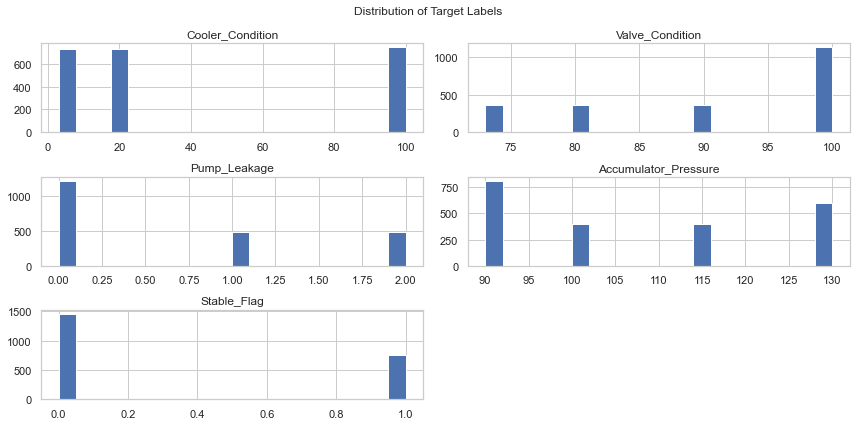

In [11]:
# 3️⃣ Distribution of Each Label
labels.hist(figsize=(12, 6), bins=20)
plt.suptitle("Distribution of Target Labels")
plt.tight_layout()
plt.show()

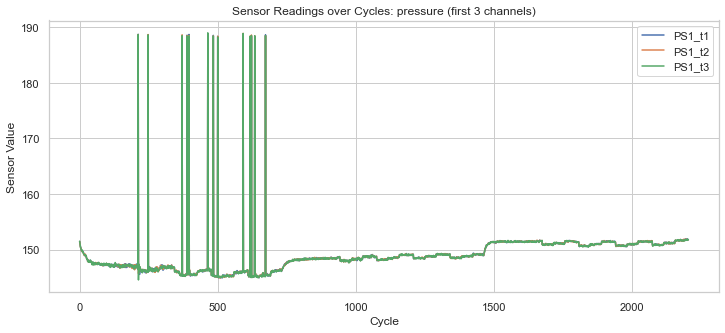

In [12]:
# 4️⃣ Plot One Sensor Group (e.g., Pressure)
selected_group = 'pressure'
if selected_group in sensor_data:
    df = sensor_data[selected_group].copy()
    df['Cycle'] = range(len(df))
    sample = df.iloc[:, :3]  # take first 3 pressure columns for simplicity
    sample['Cycle'] = df['Cycle']
    sample.set_index('Cycle').plot(figsize=(12, 5))
    plt.title(f"Sensor Readings over Cycles: {selected_group} (first 3 channels)")
    plt.xlabel("Cycle")
    plt.ylabel("Sensor Value")
    plt.grid(True)
    plt.show()

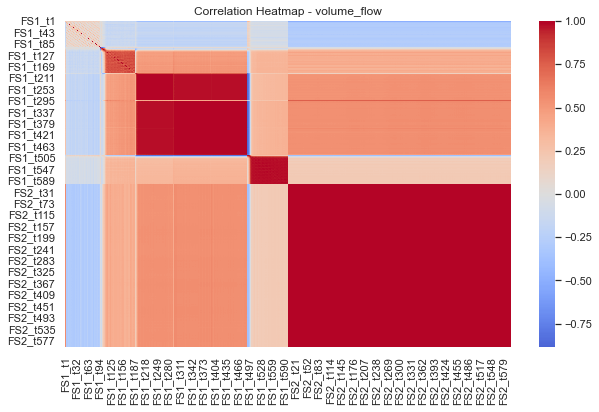

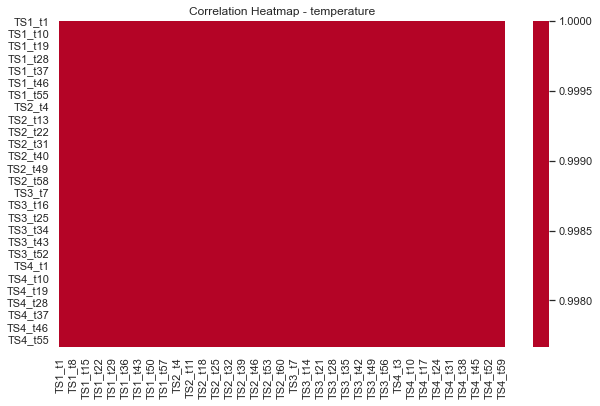

In [13]:
# 5️⃣ Correlation Heatmap (for volume flow or temperature)
for group in ['volume_flow', 'temperature']:
    if group in sensor_data:
        plt.figure(figsize=(10, 6))
        corr = sensor_data[group].corr()
        sns.heatmap(corr, cmap='coolwarm', center=0)
        plt.title(f"Correlation Heatmap - {group}")
        plt.show()

In [14]:
# 🔧 Phase 3: Feature Engineering for Hydraulic Condition Monitoring

import numpy as np
import pandas as pd

In [15]:
# ✅ Input: sensor_data (dict of grouped DataFrames), labels
# Output: X (features), y (targets)

# STEP 1: Define statistical functions to apply
def extract_statistics(df):
    stats = pd.DataFrame()
    stats['mean'] = df.mean(axis=1)
    stats['std'] = df.std(axis=1)
    stats['min'] = df.min(axis=1)
    stats['max'] = df.max(axis=1)
    stats['median'] = df.median(axis=1)
    stats['skew'] = df.skew(axis=1)
    stats['kurtosis'] = df.kurtosis(axis=1)
    return stats

In [16]:
# STEP 2: Feature Extraction per Sensor Group
X_parts = []
for group, df in sensor_data.items():
    group_stats = extract_statistics(df)
    group_stats.columns = [f"{group}_{col}" for col in group_stats.columns]
    X_parts.append(group_stats)

In [17]:
# STEP 3: Combine all features horizontally
X = pd.concat(X_parts, axis=1)

In [18]:
# STEP 4: Define label columns (targets)
y = labels.copy()  # Contains 5 target columns

print(f"✅ Final feature matrix X: {X.shape}")
print(f"✅ Labels y: {y.shape}")

✅ Final feature matrix X: (2205, 49)
✅ Labels y: (2205, 5)


In [19]:
# Optional preview
X.head()

,pressure_mean,pressure_std,pressure_min,pressure_max,pressure_median,pressure_skew,pressure_kurtosis,motor_power_mean,motor_power_std,motor_power_min,motor_power_max,motor_power_median,motor_power_skew,motor_power_kurtosis,volume_flow_mean,volume_flow_std,volume_flow_min,volume_flow_max,volume_flow_median,volume_flow_skew,volume_flow_kurtosis,temperature_mean,temperature_std,temperature_min,temperature_max,temperature_median,temperature_skew,temperature_kurtosis,vibration_mean,vibration_std,vibration_min,vibration_max,vibration_median,vibration_skew,vibration_kurtosis,cooling_mean,cooling_std,cooling_min,cooling_max,cooling_median,cooling_skew,cooling_kurtosis,efficiency_mean,efficiency_std,efficiency_min,efficiency_max,efficiency_median,efficiency_skew,efficiency_kurtosis
0,48.617025,66.116151,0.0,191.51,9.764,0.911557,-1.017258,2538.929167,185.616121,2339.8,2951.6,2479.8,1.239496,0.426911,8.507203,2.789286,0.0,18.710,10.1540,-2.013877,4.107942,36.704254,3.489575,30.363,41.250,37.2340,-0.342356,-1.076802,0.576950,0.027078,0.532,0.624,0.5770,-0.046140,-1.281031,20.732050,19.473124,1.383,47.438,15.5270,0.151889,-1.836589,59.157183,23.763984,0.0,79.568,68.5145,-2.083248,2.654072
1,48.516512,66.118845,0.0,191.47,9.567,0.913031,-1.013142,2531.498900,189.940089,2332.0,2947.4,2470.0,1.267023,0.424921,8.559207,2.813885,0.0,18.712,10.3645,-2.004730,4.002545,37.920642,2.657145,33.648,42.105,38.0780,0.056886,-1.292519,0.565850,0.027241,0.524,0.626,0.5595,0.790695,-0.152928,13.520992,12.374070,1.147,29.208,12.3670,0.028292,-1.993735,59.335617,23.857918,0.0,80.441,68.5360,-2.074927,2.635399
2,48.406214,66.033558,0.0,191.41,9.465,0.913703,-1.011267,2519.928000,190.736850,2318.6,2939.8,2457.4,1.270923,0.427050,8.542386,2.805113,0.0,18.698,10.3180,-2.015283,4.051457,38.900337,2.520980,35.098,43.039,38.9275,0.145232,-1.188004,0.576533,0.036729,0.529,0.662,0.5620,0.958227,0.060973,11.665725,10.606295,1.076,23.554,11.1895,0.005477,-2.026553,59.543150,23.923381,0.0,80.824,68.8530,-2.080158,2.652670
3,48.329288,65.993845,0.0,191.34,9.375,0.913964,-1.010743,2511.541633,191.270607,2310.8,2929.6,2448.0,1.277669,0.443224,8.511622,2.787085,0.0,18.896,10.2540,-2.027740,4.151117,39.816471,2.512111,36.105,43.988,39.7480,0.191535,-1.132917,0.569267,0.033464,0.527,0.645,0.5550,1.033802,-0.073149,10.760983,9.744800,1.022,21.565,10.3900,0.003293,-2.029611,59.794900,24.023005,0.0,80.930,69.0060,-2.081369,2.653043
4,48.245669,65.928815,0.0,191.41,9.290,0.914447,-1.009291,2503.449500,191.258369,2301.8,2923.8,2440.6,1.281263,0.455485,8.464029,2.771294,0.0,18.876,10.1865,-2.047406,4.192579,40.718779,2.536966,36.992,44.887,40.6250,0.173983,-1.141733,0.577367,0.033484,0.524,0.660,0.5760,0.816469,0.137500,10.428742,9.399746,1.016,20.460,10.1195,0.001427,-2.032208,59.455267,23.972262,0.0,81.100,69.0130,-2.051926,2.576797


In [20]:
# 🔮 Phase 4: Predictive Modeling with XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import os

In [21]:
# === X and y from previous step ===
# X: feature matrix (2205, 49)
# y: target DataFrame (2205, 5 labels)

# STEP 1: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y.copy(), test_size=0.2, random_state=42)

In [22]:
# STEP 2: Define model configurations for each target
tasks = {
    'Cooler_Condition': 'reg:squarederror',
    'Valve_Condition': 'multi:softprob',
    'Pump_Leakage': 'multi:softprob',
    'Accumulator_Pressure': 'reg:squarederror',
    'Stable_Flag': 'binary:logistic'
}

In [23]:
# STEP 3: Encode classification labels where needed
label_encoders = {}
for col, task in tasks.items():
    if 'multi' in task or 'binary' in task:
        le = LabelEncoder()
        y_train[col + '_enc'] = le.fit_transform(y_train[col])
        y_test[col + '_enc'] = le.transform(y_test[col])
        label_encoders[col] = le

In [24]:
# STEP 4: Train and evaluate per target
trained_models = {}  # ✅ Collect models for later saving

for target, objective in tasks.items():
    print(f"\n🔧 Training model for: {target}")

    model = (
        xgb.XGBClassifier(objective=objective, eval_metric='mlogloss', use_label_encoder=False)
        if 'multi' in objective or 'binary' in objective
        else xgb.XGBRegressor(objective=objective, eval_metric='rmse')
    )

    label_col = target if objective.startswith('reg') else target + '_enc'

    # Confirm label_col exists
    if label_col not in y_train.columns:
        print(f"❌ Skipping {target} – Label column missing: {label_col}")
        continue

    try:
        model.fit(X_train, y_train[label_col])
        y_pred = model.predict(X_test)

        if 'multi' in objective or 'binary' in objective:
            print(f"✅ Accuracy: {accuracy_score(y_test[label_col], y_pred):.4f}")
            print(classification_report(y_test[label_col], y_pred))

        else:
            # Manual RMSE fallback
            mse = mean_squared_error(y_test[label_col], y_pred)
            rmse = mse ** 0.5
            mae = mean_absolute_error(y_test[label_col], y_pred)
            print(f"✅ RMSE: {rmse:.2f} | MAE: {mae:.2f}")

        # ✅ Store trained model
        trained_models[target] = model

    except Exception as e:
        print(f"❌ Error while training {target}: {e}")


🔧 Training model for: Cooler_Condition
✅ RMSE: 4.94 | MAE: 0.48

🔧 Training model for: Valve_Condition


C:\Users\melny\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [06:56:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9841
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       1.00      0.97      0.98        67
           2       0.93      1.00      0.96        80
           3       1.00      0.98      0.99       206

    accuracy                           0.98       441
   macro avg       0.98      0.99      0.98       441
weighted avg       0.99      0.98      0.98       441


🔧 Training model for: Pump_Leakage


C:\Users\melny\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [06:56:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9977
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       101
           2       1.00      0.99      1.00       112

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441


🔧 Training model for: Accumulator_Pressure
✅ RMSE: 3.17 | MAE: 1.78

🔧 Training model for: Stable_Flag


C:\Users\melny\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [06:56:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9683
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       294
           1       0.99      0.92      0.95       147

    accuracy                           0.97       441
   macro avg       0.97      0.96      0.96       441
weighted avg       0.97      0.97      0.97       441



📊 SHAP Summary Plot:


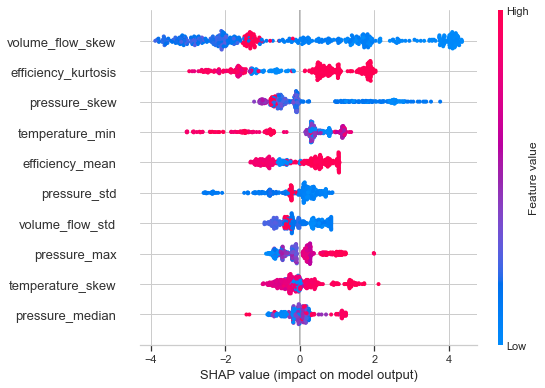

In [25]:
# SHAP explanation (on a small subset for speed)
print("📊 SHAP Summary Plot:")
explainer = shap.Explainer(model, X_train[:500])
shap_values = explainer(X_train[:500])
shap.summary_plot(shap_values, X_train[:500], max_display=10)

In [26]:
# ✅ Save model in dictionary
trained_models[target] = model

In [27]:
# STEP 5: Save trained models to .joblib
os.makedirs('models', exist_ok=True)
model_paths = {
    'Cooler_Condition': 'models/cooler_model.joblib',
    'Valve_Condition': 'models/valve_model.joblib',
    'Pump_Leakage': 'models/pump_model.joblib',
    'Accumulator_Pressure': 'models/accumulator_model.joblib',
    'Stable_Flag': 'models/stable_model.joblib'
}

In [28]:
for target, path in model_paths.items():
    if target in trained_models:
        joblib.dump(trained_models[target], path)
        print(f"💾 Saved: {target} → {path}")
    else:
        print(f"⚠️ Model for {target} not found. Skipping save.")

💾 Saved: Cooler_Condition → models/cooler_model.joblib
💾 Saved: Valve_Condition → models/valve_model.joblib
💾 Saved: Pump_Leakage → models/pump_model.joblib
💾 Saved: Accumulator_Pressure → models/accumulator_model.joblib
💾 Saved: Stable_Flag → models/stable_model.joblib
